#### COMPANION WORKBOOK

# Exploratory Analysis

First step in the project of predicting real estate prices.

Last edited: 1/6/2022

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Load real estate data from CSV
df = pd.read_csv('real_estate_data.csv')

## <span style="color:RoyalBlue">Exercise 1.1 - Back to Basics</span>

Before moving on, let's dig a bit deeper into some of the exploratory analysis basics. Getting some extra practice right now will set you up for smoother success as you continue through the project.

#### A.) First, try to filter <code style="color:steelblue">df.dtypes</code> to only categorical variables.
* **Tip:** Remember our boolean masks from Python for Data Science?
* **Tip:** A Series can be filtered by boolean masks the same way that a DataFrame can be.

In [3]:
df.loc[:,df.dtypes=='object'].dtypes

# Filter and display only df.dtypes that are 'object'
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type     object
exterior_walls    object
roof              object
dtype: object
</pre>

#### B.) Iterate through the categorical feature names and print each name.
* By the way, to actually get the **feature names** that you can iterate through, you have to access the <code style="color:steelblue">.index</code> attribute.
* **Tip:** Filter as you did in part (A), and then call the <code style="color:steelblue">.index</code> attribute.

In [4]:
for fea in df.dtypes[df.dtypes == 'object'].index:
    print(fea) 

property_type
exterior_walls
roof


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type
exterior_walls
roof
</pre>

As you'll see later, the ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful.

#### C.) Next, look at a few more examples by displaying the first 10 rows of data, instead of just the first 5.
* **Tip:** <code style="color:steelblue">df.head()</code> returns the first 5 rows by default, but you can pass in an integer argument for the number of rows you want.

In [5]:
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

#### D.) Display the last 5 rows of data.
* **Hint:** You've seen the "head," but what about the "tail?"

In [6]:
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


## <span style="color:RoyalBlue">Exercise 1.2 - Back to Distributions</span>
You don't need to memorize a whole bunch of data visualization syntax in order to be successful in data science and machine learning. However, there are a few key techniques you'll need to know, including:
* How to increase the figure size to give each sub-chart more space.
* How to rotate axis labels to make them more legible.
* How to arrive at a decent chart with the help of documentation and some **trial-and-error.**

In this exercise, let's make the histogram grid plot from the Coding Section much more legible.

#### A.) First, recreate the histogram grid from the coding section.
* Think about: how might you improve this plot to make it more legible and useful?

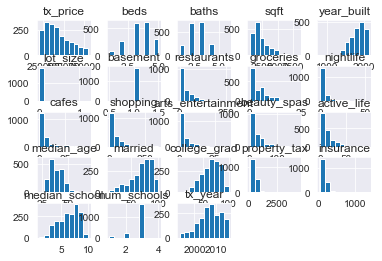

In [7]:
df.hist()

plt.show()

#### B.) Plot the same histogram grid as above, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.
* **Tip:** Try making the figure size 14 x 14. 
* **Tip:** The <code style="color:steelblue">figsize=</code> argument takes a **tuple** for figure size.
* **Tip:** The <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.
* The <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html" target="_blank">official documentation page</a> is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* It's ok to arrive at the answer through **trial and error** (this is often easier than memorizing the various arguments).

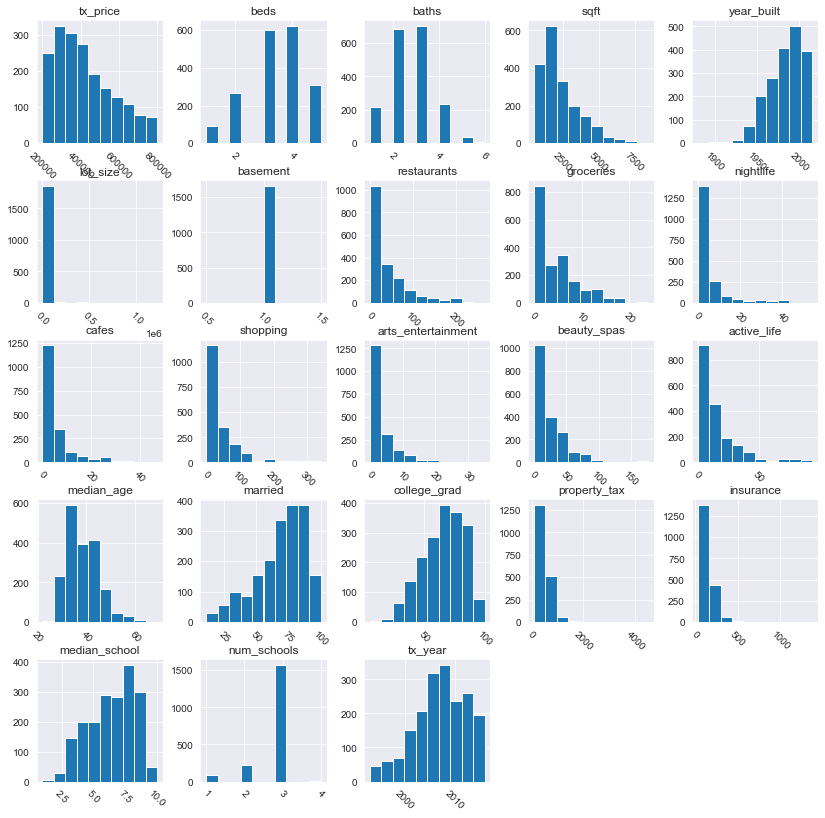

In [8]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="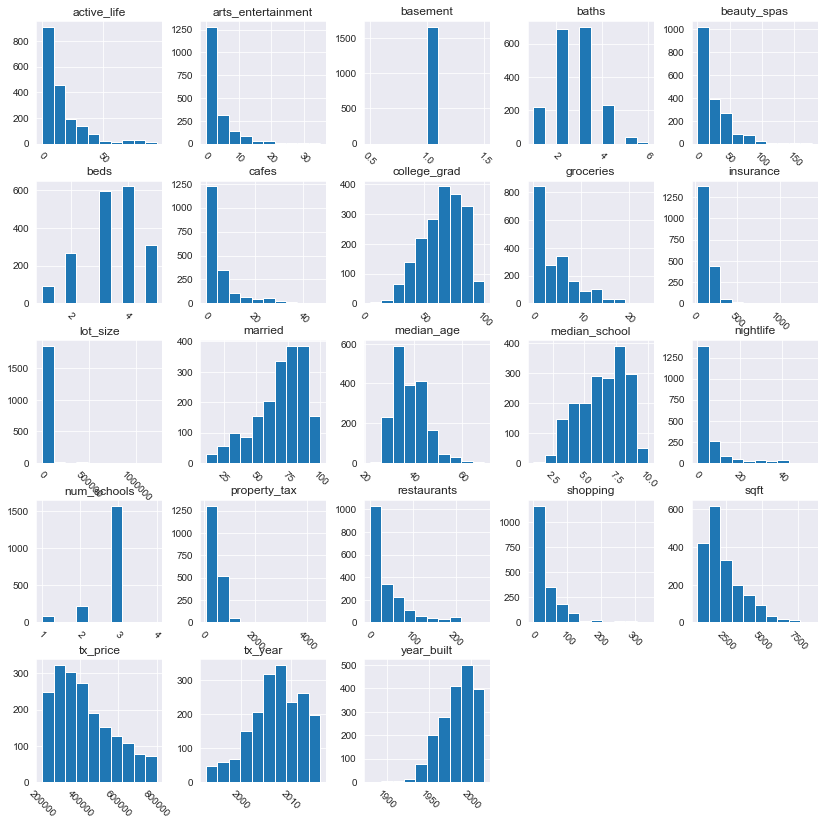&#10;">

#### C.) Next, display summary statistics for the numerical features again. Then, answer the following questions:
1. In our dataset, what is the earliest transaction year (**tx_year**)?
2. Among all properties in our dataset, what is the maximum number of bedrooms (**beds**)?
3. In our dataset, do we see more variance in the number of bedrooms (**beds**) or the number of bathrooms (**baths**)?
4. Half of all properties in the dataset have a total floor size between 1345 **sqft** and which other value?

In [9]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


Finally, in the Coding Section, we only displayed the bar plot for one of the categorical features, **exterior_walls**. Let's do the same for the other features and check for sparse classes.

#### D.) Write a <code style="color:steelblue">for</code> loop (that can handle any number of categorical features) to plot bar plots of each of the categorical features.
* **Tip:** Borrow from your answer to **part (A) of Exercise 1.1**.
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all 3 plots in one output.
* Which features suffer from sparse classes?

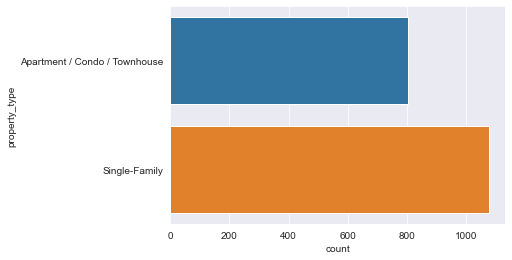

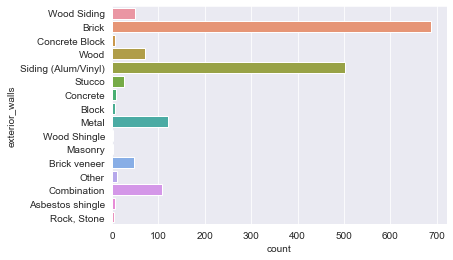

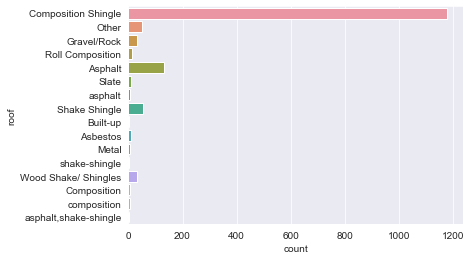

In [10]:
for fea in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y = str(fea), data=df)
    plt.show()

## <span style="color:RoyalBlue">Exercise 1.3 - Back to Segmentations</span>

As we saw in the Coding Section, on average, single family homes are more expensive. How else do the different property types differ? Let's see:

#### A.) First, segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.

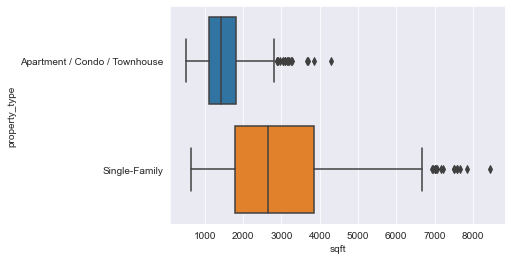

In [11]:
sns.boxplot(y = 'property_type', x='sqft', data=df)
plt.show()

#### B.) After producing the plot, answer these questions:
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

#### C.) Next, display the standard deviations of each feature alongside their means.
* This will give you a better idea of the variation within in feature, by class.
* **Tip:** Pass a list of metrics into the <code style="color:steelblue">.agg()</code> function, after performing your groupby.
* Check out the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once" target="_blank">documentation</a> for more help.

In [12]:
df.groupby(['property_type']).agg(['mean','std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<strong style="color:RoyalBlue">Expected output:</strong>


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">tx_price</th>
      <th colspan="2" halign="left">beds</th>
      <th colspan="2" halign="left">baths</th>
      <th colspan="2" halign="left">sqft</th>
      <th colspan="2" halign="left">year_built</th>
      <th colspan="2" halign="left">lot_size</th>
      <th colspan="2" halign="left">basement</th>
      <th colspan="2" halign="left">restaurants</th>
      <th colspan="2" halign="left">groceries</th>
      <th colspan="2" halign="left">nightlife</th>
      <th colspan="2" halign="left">cafes</th>
      <th colspan="2" halign="left">shopping</th>
      <th colspan="2" halign="left">arts_entertainment</th>
      <th colspan="2" halign="left">beauty_spas</th>
      <th colspan="2" halign="left">active_life</th>
      <th colspan="2" halign="left">median_age</th>
      <th colspan="2" halign="left">married</th>
      <th colspan="2" halign="left">college_grad</th>
      <th colspan="2" halign="left">property_tax</th>
      <th colspan="2" halign="left">insurance</th>
      <th colspan="2" halign="left">median_school</th>
      <th colspan="2" halign="left">num_schools</th>
      <th colspan="2" halign="left">tx_year</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>property_type</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Apartment / Condo / Townhouse</th>
      <td>366614.034869</td>
      <td>121784.490486</td>
      <td>2.601494</td>
      <td>0.810220</td>
      <td>2.200498</td>
      <td>0.815009</td>
      <td>1513.727273</td>
      <td>556.286650</td>
      <td>1988.936488</td>
      <td>15.513640</td>
      <td>3944.239103</td>
      <td>44284.168767</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>58.418431</td>
      <td>54.343594</td>
      <td>5.919054</td>
      <td>4.645774</td>
      <td>7.855542</td>
      <td>10.643816</td>
      <td>8.037360</td>
      <td>9.077038</td>
      <td>57.631382</td>
      <td>61.852299</td>
      <td>4.840598</td>
      <td>5.234834</td>
      <td>32.087173</td>
      <td>26.910443</td>
      <td>22.410959</td>
      <td>21.058178</td>
      <td>37.199253</td>
      <td>6.906584</td>
      <td>57.534247</td>
      <td>20.372706</td>
      <td>66.372354</td>
      <td>17.095874</td>
      <td>346.261519</td>
      <td>142.292282</td>
      <td>105.652553</td>
      <td>47.118015</td>
      <td>6.382316</td>
      <td>1.941998</td>
      <td>2.831880</td>
      <td>0.455370</td>
      <td>2007.941469</td>
      <td>4.099487</td>
    </tr>
    <tr>
      <th>Single-Family</th>
      <td>464644.711111</td>
      <td>157758.739013</td>
      <td>4.029630</td>
      <td>0.795639</td>
      <td>2.862037</td>
      <td>0.937551</td>
      <td>2935.865741</td>
      <td>1422.871169</td>
      <td>1978.523148</td>
      <td>22.210582</td>
      <td>20417.666667</td>
      <td>44165.529302</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>26.672222</td>
      <td>34.726416</td>
      <td>3.453704</td>
      <td>4.067285</td>
      <td>3.007407</td>
      <td>5.543822</td>
      <td>3.308333</td>
      <td>5.325053</td>
      <td>28.289815</td>
      <td>42.292313</td>
      <td>2.318519</td>
      <td>3.929691</td>
      <td>16.970370</td>
      <td>22.872112</td>
      <td>10.946296</td>
      <td>12.599296</td>
      <td>39.643519</td>
      <td>6.225732</td>
      <td>77.685185</td>
      <td>13.868205</td>
      <td>64.128704</td>
      <td>16.790347</td>
      <td>556.383333</td>
      <td>244.351559</td>
      <td>166.329630</td>
      <td>77.816022</td>
      <td>6.592593</td>
      <td>2.031663</td>
      <td>2.764815</td>
      <td>0.537959</td>
      <td>2006.494444</td>
      <td>5.807059</td>
    </tr>
  </tbody>
</table>

## <span style="color:RoyalBlue">Exercise 1.5 - Back to Correlations</span>

#### A.) Before we begin, re-create the <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code> and visualize the correlation grid with a basic heatmap (same as in the coding section).
* Remember to set the proper **cmap** argument.

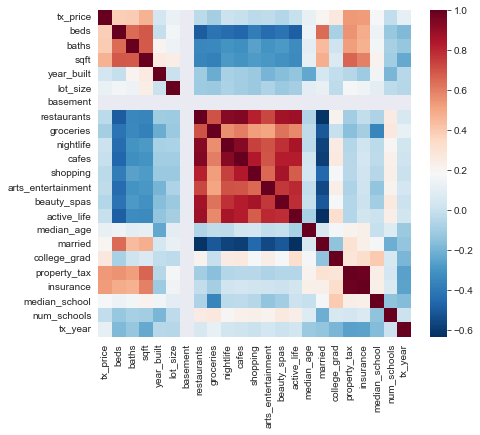

In [13]:
correlations = df.corr()

plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="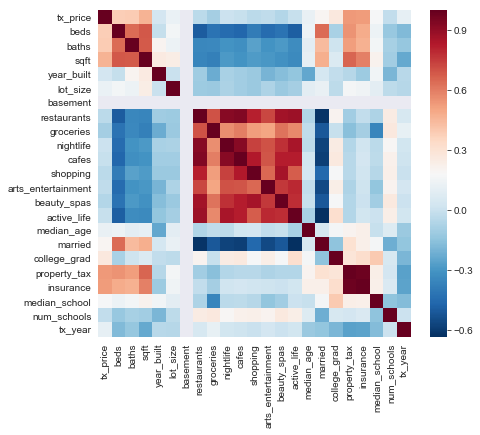&#10;">

#### Next, when plotting a heatmap of correlations, it's often helpful to do four things:
1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual clutter)
4. Drop the legend (colorbar on the side)

#### B.) First, change the background to white.
* Seaborn has several different **themes**. The default theme we use is called <code style="color:crimson">'darkgrid'</code>.
* You can change the theme with <code style="color:steelblue">sns.set_style()</code>.
* You only need to run this once, and the theme will persist until you change it again.
* Change the theme to <code style="color:crimson">'white'</code>
* Also, make the figure size 10 x 8 so that the plot is a bit larger.

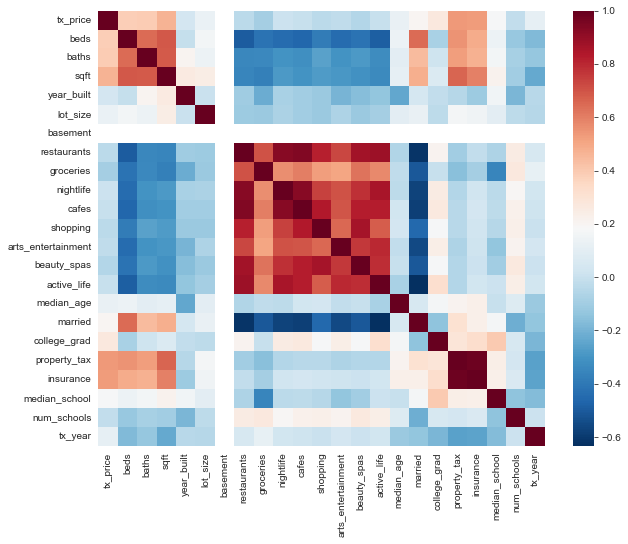

In [14]:
# Change color scheme
sns.set_style('white')

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="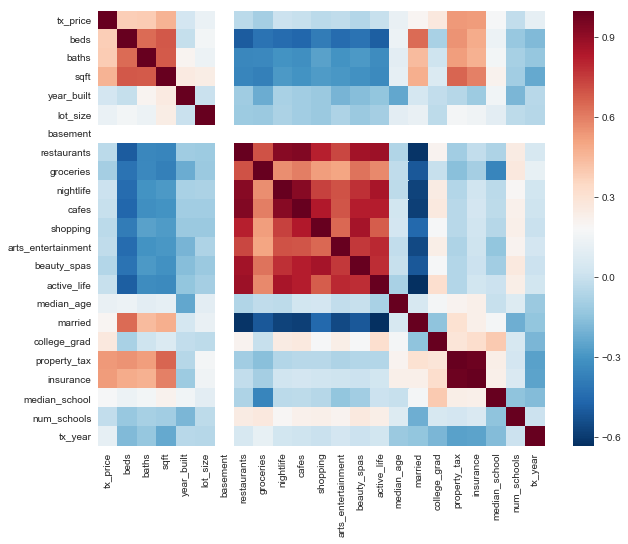&#10;">

See how the cells for <code style="color:steelblue">'basement'</code> are now white? That's what we want because they were not able to be calculated.

#### C.) Next, display the correlation values in each cell.
* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.
* To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
* Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.

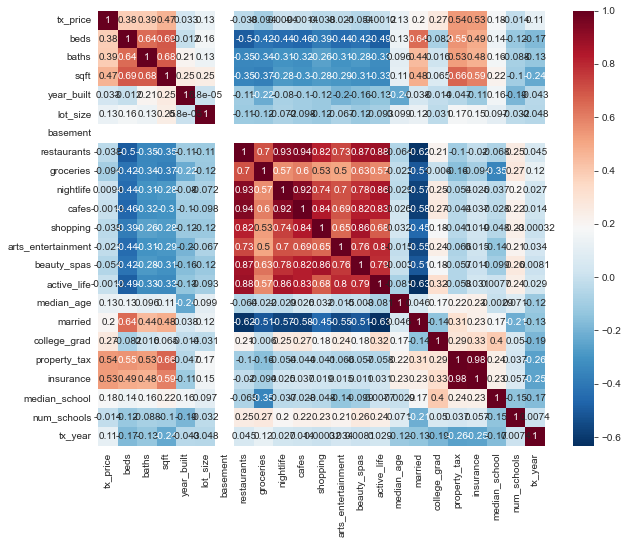

In [15]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlations, cmap='RdBu_r', annot=True)

plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="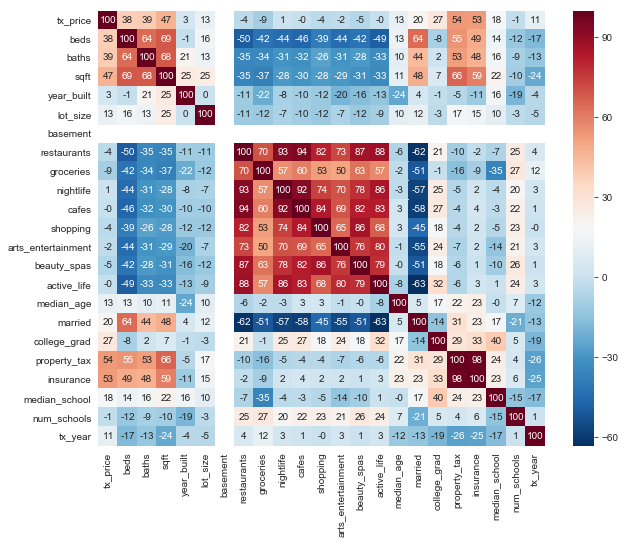&#10;">

So one thing to notice about the correlation matrix is that the upper triangle is an exact mirror of the lower triangle. This is because all of the features appear on both the x-axis AND the y-axis. In other words, the grid will show both the **correlation between "A and B"** as well the **correlation between "B and A"**.

However, the **correlation between "A and B"** is exactly the same as the **correlation between "B and A"**! Here's what we mean:

#### D.) Print the correlation between *beds* and *baths* and between *baths* and *beds*.
* **Tip:** All you need to do is call the <code>.corr()</code> method on a subset of <code>df</code> with only the *beds* and *baths* features.

In [16]:
df[['beds', 'baths']].corr()

,beds,baths
beds,1.000000,0.644572
baths,0.644572,1.000000


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>beds</th>
      <th>baths</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>beds</th>
      <td>1.000000</td>
      <td>0.644572</td>
    </tr>
    <tr>
      <th>baths</th>
      <td>0.644572</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

Because the top triangle of the correlation matrix is **redundant** with the lower triangle, we can choose to hide it if we want to reduce the amount of visual clutter. Here's how:

#### E.) Generate a boolean mask for the top triangle.
* The mask should have the same shape (i.e. dimensions) as the correlation matrix.
* The values in the upper triangle should be True/1 while those in the lower triangle should be False/0.
* Either a mask of 0's and 1's OR a mask of False's and True's will work.
* **Tip:** <code>np.zeros_like()</code> returns an array of zeros with the same shape as a given array.
* **Tip:** <code>np.triu_indices_from()</code> returns the indices for the upper triangle of an array.
* **Tip:** Remember that NumPy arrays are mutable, which means that you can "overwrite" the values in any array by selecting those values by their indices.
* **Tip:** Feel free to insert more code cells and play around with this a bit. This is meant to be a trickier exercise, so check the answer key if the solution still eludes you after several minutes of trial-and-error.

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(correlations)] = 1

mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0.,

#### F.) Just to be clear on what we've created, let's visualize that triangular mask and see what's going on under the hood.
* You can use Seaborn heatmaps for more than just correlation plots. Plot a seaborn heatmap of the mask.
* Do you see how there are only two values, True (1) and False (0)? Notice how the values in the upper triangle are all True/1 and the ones in the lower triangle are all False/1.
* **Tip:** For this heatmap, we're just using the default color map.

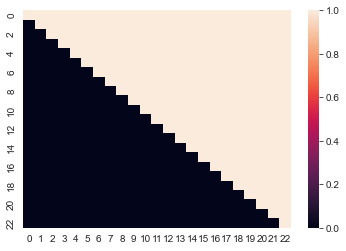

In [18]:
sns.heatmap(mask)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="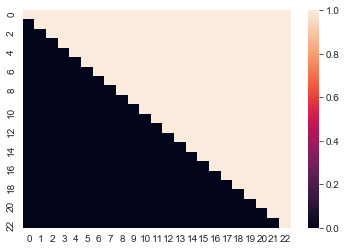&#10;">

After creating a triangular mask like the one above, we can pass it into the <code style="color:steelblue">sns.heatmap()</code> function to hide certain cells (i.e. all of the True values in the mask).

#### G.) Plot the correlation heatmap again, this time using that mask.
* **Tip:** <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes you've made up to now.

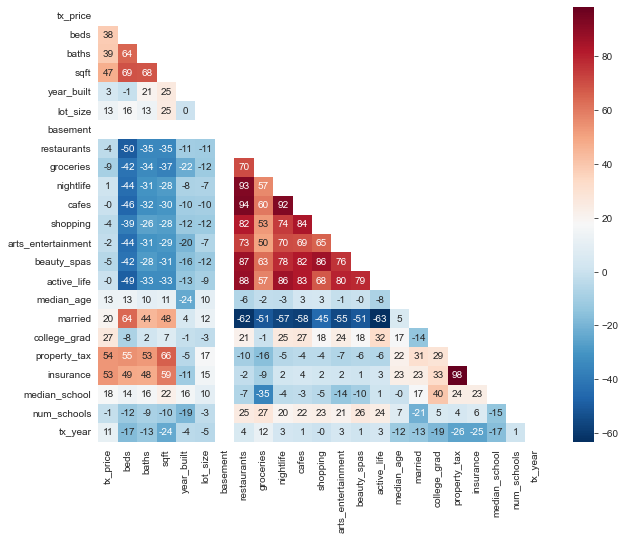

In [19]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="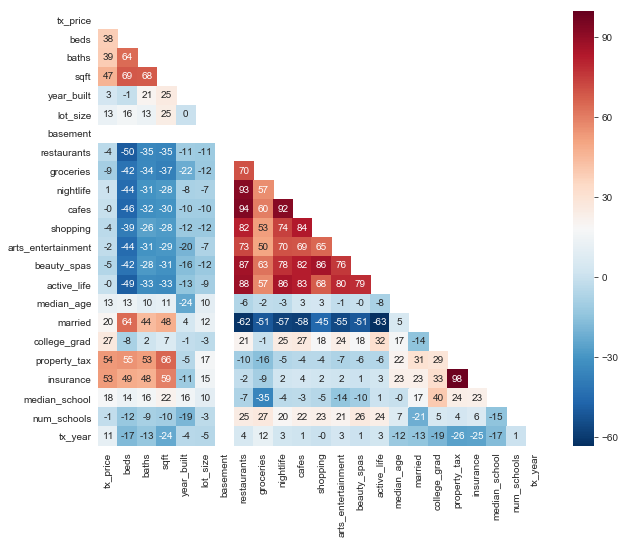&#10;">

#### H.) Finally, remove the colorbar on the side.
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Keep all of the other styling changes you've made up to now.
* But change the figure size to 9 x 8 (since we're removing the sidebar, this will help us keep nice proportions)

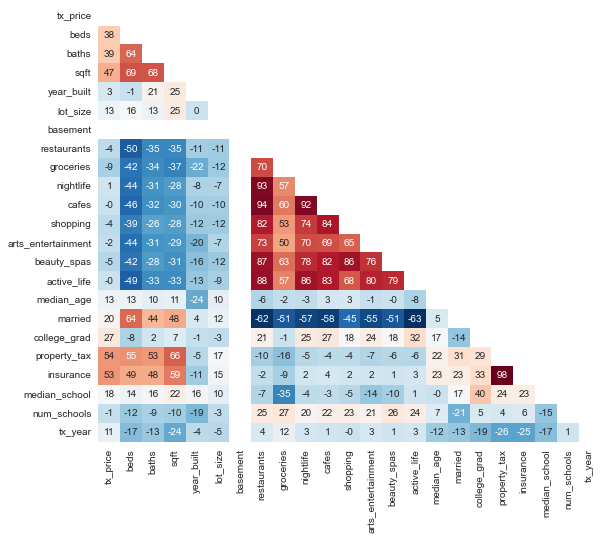

In [20]:
# Make the figsize 9 x 8
plt.figure(figsize=(9,8))

# Plot heatmap of correlations
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar=False)
plt.show()



<strong style="color:RoyalBlue">Expected output:</strong>
<img src="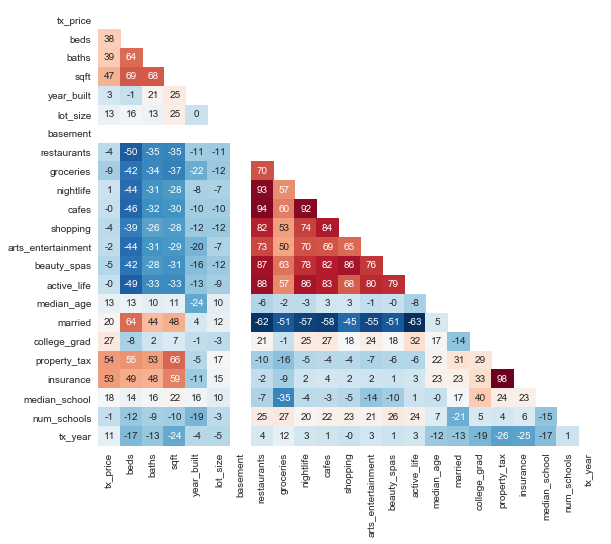&#10;">

Before powering on to the next module, we recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.

As a reminder, here are a few things you did in this module:
* You explored basic information about your dataset.
* You plotted distributions of numeric and categorical features.
* You segmented your dataset by <code style="color:steelblue">'property_type'</code>.
* And you visualized a heatmap of feature correlations.

As you work through the next module, Data Cleaning, we recommend keeping this workbook open in a separate tab. It might be helpful to have your charts in front of you as you clean the data.